In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
rawAbsData = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12],
['A',0.672,0.628,0.607,0.655,0.668,0.669,0.644,0.676,0.687,0.687,0.677,0.662],
['B',0.681,0.628,0.661,0.185,0.411,0.426,0.282,0.394,0.311,0.054,0.218,0.31],
['C',0.676,0.638,0.662,0.34,0.452,0.465,0.412,0.414,0.426,0.336,0.418,0.42],
['D',0.667,0.629,0.637,0.651,0.65,0.628,0.638,0.66,0.633,0.601,0.643,0.627],
['E',0.682,0.64,0.662,0.559,0.576,0.599,0.535,0.56,0.531,0.529,0.563,0.53],
['F',0.669,0.632,0.651,0.263,0.451,0.452,0.355,0.3,0.367,0.158,0.357,0.666],
['G',0.673,0.643,0.652,0.56,0.6,0.593,0.544,0.53,0.559,0.473,0.524,0.499],
['H',0.664,0.63,0.623,0.579,0.628,0.613,0.57,0.56,0.682,0.489,0.576,0.547]])

absData = np.array([[ '','0','0','0','5','5','5','10','10','10','15','15','15'],
['Loopless',-0.009,0,-0.054,0.47,0.257,0.243,0.362,0.282,0.376,0.633,0.459,0.352],
['Loopfull',-0.004,-0.01,-0.055,0.315,0.216,0.204,0.232,0.262,0.261,0.351,0.259,0.242],
['Anc1',0.005,-0.001,-0.03,0.004,0.018,0.041,0.006,0.016,0.054,0.086,0.034,0.035],
['Anc2',-0.01,-0.012,-0.055,0.096,0.092,0.07,0.109,0.116,0.156,0.158,0.114,0.132],
['Anc3',0.003,-0.004,-0.044,0.392,0.217,0.217,0.289,0.376,0.32,0.529,0.32,-0.004],
['Anc4',-0.001,-0.015,-0.045,0.095,0.068,0.076,0.1,0.146,0.128,0.214,0.153,0.163],
['Anc5',0.008,-0.002,-0.016,0.076,0.04,0.056,0.074,0.116,0.005,0.198,0.101,0.115]])
absData

array([['', '0', '0', '0', '5', '5', '5', '10', '10', '10', '15', '15',
        '15'],
       ['Loopless', '-0.009', '0', '-0.054', '0.47', '0.257', '0.243',
        '0.362', '0.282', '0.376', '0.633', '0.459', '0.352'],
       ['Loopfull', '-0.004', '-0.01', '-0.055', '0.315', '0.216',
        '0.204', '0.232', '0.262', '0.261', '0.351', '0.259', '0.242'],
       ['Anc1', '0.005', '-0.001', '-0.03', '0.004', '0.018', '0.041',
        '0.006', '0.016', '0.054', '0.086', '0.034', '0.035'],
       ['Anc2', '-0.01', '-0.012', '-0.055', '0.096', '0.092', '0.07',
        '0.109', '0.116', '0.156', '0.158', '0.114', '0.132'],
       ['Anc3', '0.003', '-0.004', '-0.044', '0.392', '0.217', '0.217',
        '0.289', '0.376', '0.32', '0.529', '0.32', '-0.004'],
       ['Anc4', '-0.001', '-0.015', '-0.045', '0.095', '0.068', '0.076',
        '0.1', '0.146', '0.128', '0.214', '0.153', '0.163'],
       ['Anc5', '0.008', '-0.002', '-0.016', '0.076', '0.04', '0.056',
        '0.074', '0.116', '0.005'

In [ ]:
df_absData = pd.DataFrame(absData[1:9,1:13], columns= absData[0,1:], index = absData[1:,0] )
df_absData

,0,0,0,5,5,5,10,10,10,15,15,15
Loopless,-0.009,0,-0.054,0.47,0.257,0.243,0.362,0.282,0.376,0.633,0.459,0.352
Loopfull,-0.004,-0.01,-0.055,0.315,0.216,0.204,0.232,0.262,0.261,0.351,0.259,0.242
Anc1,0.005,-0.001,-0.03,0.004,0.018,0.041,0.006,0.016,0.054,0.086,0.034,0.035
Anc2,-0.01,-0.012,-0.055,0.096,0.092,0.07,0.109,0.116,0.156,0.158,0.114,0.132
Anc3,0.003,-0.004,-0.044,0.392,0.217,0.217,0.289,0.376,0.32,0.529,0.32,-0.004
Anc4,-0.001,-0.015,-0.045,0.095,0.068,0.076,0.1,0.146,0.128,0.214,0.153,0.163
Anc5,0.008,-0.002,-0.016,0.076,0.04,0.056,0.074,0.116,0.005,0.198,0.101,0.115


In [ ]:
samples = list(set(df_absData.index.values))
samples

['Anc2', 'Anc4', 'Anc3', 'Anc1', 'Anc5', 'Loopless', 'Loopfull']

In [ ]:
conditions = list(set(df_absData.columns.values))
conditions

['0', '10', '15', '5']

In [ ]:
df_averages = pd.DataFrame(columns=conditions, index= samples)
df_stds = pd.DataFrame(columns=conditions, index=samples)

for condition in conditions:
  for sample in samples:
    toAverage = df_absData.loc[[sample],[condition]]
    df_averages.at[sample, condition] = np.average(toAverage.values.astype('float'))
    df_stds.at[sample, condition] = np.std(toAverage.values.astype('float'))

In [ ]:
df_averages

,0,10,15,5
Anc2,-0.025667,0.127,0.134667,0.086
Anc4,-0.020333,0.124667,0.176667,0.079667
Anc3,-0.015,0.328333,0.281667,0.275333
Anc1,-0.008667,0.025333,0.051667,0.021
Anc5,-0.003333,0.065,0.138,0.057333
Loopless,-0.021,0.34,0.481333,0.323333
Loopfull,-0.023,0.251667,0.284,0.245


In [ ]:
df_stds

,0,10,15,5
Anc2,0.020758,0.020704,0.018062,0.011431
Anc4,0.018355,0.018927,0.026712,0.011324
Anc3,0.020704,0.036003,0.219278,0.082496
Anc1,0.015283,0.020677,0.024281,0.015253
Anc5,0.009843,0.04576,0.04281,0.014727
Loopless,0.023622,0.041409,0.1158,0.103866
Loopfull,0.02276,0.013912,0.047882,0.049739


In [ ]:
linearRegressions = {}
x = [int(cond) for cond in conditions if cond.isdigit()]
x.sort()

for sample in samples:
  y = [float(df_averages.loc[sample,[str(cond)]].values[0]) for cond in x]
  x2 = np.array(x)
  x2 = x2[:,np.newaxis]
  slope, _, _, _ = np.linalg.lstsq(x2, np.array(y), rcond= None)
  linearRegressions[sample] = (slope)

In [ ]:
linearRegressions

{'Anc1': array([0.0032381]),
 'Anc2': array([0.01062857]),
 'Anc3': array([0.02538571]),
 'Anc4': array([0.01227143]),
 'Anc5': array([0.00859048]),
 'Loopfull': array([0.0228619]),
 'Loopless': array([0.0349619])}

[0.01062857]
[0.01227143]
[0.02538571]
[0.0032381]
[0.00859048]
[0.0349619]
[0.0228619]


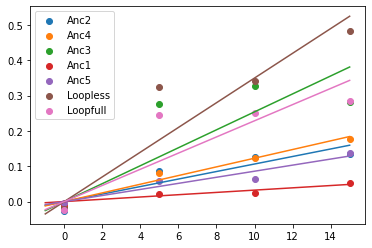

In [ ]:
x = [int(cond) for cond in conditions if cond.isdigit()]
X = np.linspace(-1, 15, 100)
for sample in samples:
  y = [float(df_averages.loc[[sample],[str(cond)]].values[0]) for cond in x]
  plt.scatter(x,y, label=sample)
  slope = linearRegressions[sample][0]
  print(linearRegressions[sample])
  Y = (slope * X) 
  plt.plot(X,Y)
  plt.legend(loc='upper left')
plt.show()